D  [0.1115874  1.82756732]
V  [[-0.77892863  0.62711258]
 [ 0.62711258  0.77892863]]


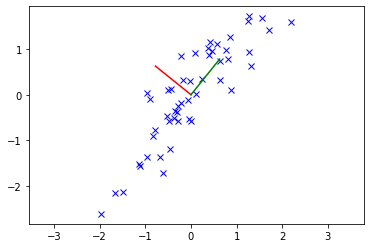

array([[ 2.626507  ],
       [ 1.02991717],
       [-0.56878956],
       [-3.26461331],
       [ 1.03125201],
       [ 1.243546  ],
       [-0.63040749],
       [-1.0918599 ],
       [ 0.13512302],
       [ 1.22296529],
       [ 1.11665618],
       [ 1.30914985],
       [ 2.04252706],
       [ 0.42340417],
       [ 0.65248402],
       [-0.12584036],
       [-1.90387244],
       [-0.27203567],
       [-0.44594734],
       [-1.2170346 ],
       [ 0.62610201],
       [-1.65776749],
       [-2.71677957],
       [ 0.9382322 ],
       [-0.49852575],
       [ 1.51697495],
       [ 0.97798492],
       [-1.70897789],
       [-0.37791748],
       [ 2.27656773],
       [-0.45696749],
       [ 1.53462416],
       [-1.48715474],
       [ 1.15382198],
       [-2.59138995],
       [ 2.18291681],
       [ 0.21943391],
       [-0.69718081],
       [-1.22239676],
       [-0.48979533],
       [-0.62595645],
       [-0.62415016],
       [ 0.77378837],
       [-0.75195459],
       [-1.91539394],
       [ 0

In [46]:
import numpy as np
import matplotlib.pyplot as plt
# center input dataset
def center(X,P):
    X_means = np.mean(X,axis=0)
    X_centered = X - np.repeat(X_means.reshape(1,-1),P,axis=0)
    return X_centered
# compute Principal Components
def compute_pcs(X,lam,P):
    # Covariance matrix
    Cov = 1/P*np.dot(X.T,X)+lam*np.eye(X.shape[1])
    # use nmupy to get eigenvalues and eigenvectors
    D,V = np.linalg.eigh(Cov)
    return D,V
# Test with random data
P = 50 # points in data set
N = 2 # n. dimensions
x1 = np.random.randn(P,1)
x2 = x1 + .5*np.random.randn(P,1)
x = np.append(x1,x2,axis=1)
X = center(x,P)
plt.plot(X[:,0],X[:,1],'xb')
D, V = compute_pcs(X,.001,P)
print("D ", D)
print("V ", V)
plt.plot([0, V[0,0]],[0, V[1,0]],'r')
plt.plot([0, V[0,1]],[0, V[1,1]],'g')
plt.axis('equal');
plt.show()

maxD = np.max(D)
maxIndex = np.where(D==maxD)
Vmax = V[maxIndex]
Vmax.reshape(-1,1)
np.linalg.norm(Vmax)

dot = np.dot(np.asarray(X),np.asarray(Vmax).T)
dot
#plt.scatter(dot)

# 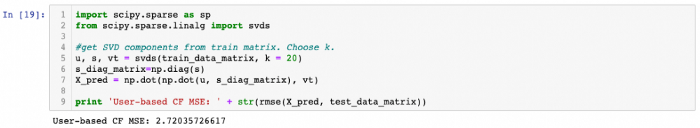


  User  Sci-Fi  Romance  Action  Comedy  Educational  Classic  Horror
0    A      10        0       0       4            5        4       3
1   B        1       10       2       8            3        3       1
2    C       3        0       0       4            5        4       3
3    D       1        9       4       9            3        3       3
4    E       3        1       1       1            9        9       1
5    F       1        4       1       1           10       10       1
6    G       0        1       1       1           10        8       1
[['A' 10 0 0 4 5 4 3]
 ['B ' 1 10 2 8 3 3 1]
 ['C' 3 0 0 4 5 4 3]
 ['D' 1 9 4 9 3 3 3]
 ['E' 3 1 1 1 9 9 1]
 ['F' 1 4 1 1 10 10 1]
 ['G' 0 1 1 1 10 8 1]]
[[10 0 0 4 5 4 3]
 [1 10 2 8 3 3 1]
 [3 0 0 4 5 4 3]
 [1 9 4 9 3 3 3]
 [3 1 1 1 9 9 1]
 [1 4 1 1 10 10 1]
 [0 1 1 1 10 8 1]]
[10 0 0 4 5 4 3]
A [10 0 0 4 5 4 3]
B [3 0 0 4 5 4 3]
C [3 0 0 4 5 4 3]
D [3 1 1 1 9 9 1]
7.0
7.483314773547883
[9. 0. 0. 0. 0. 0. 0.]
User to  A
8.1853527718724

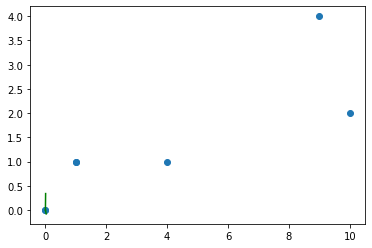

maxD 422.01562946079423
Vmax [[ 0.65585329 -0.44307923 -0.20404291 -0.53638676 -0.12642643  0.06202517
  -0.15608405]]
dot [[3.5607022397975543]
 [-8.82340674216394]
 [-1.0302707901518782]
 [-9.636968181708896]
 [0.048355579100489654]
 [-2.6569899508164614]
 [-2.1076558839495925]]
[5.90267961]


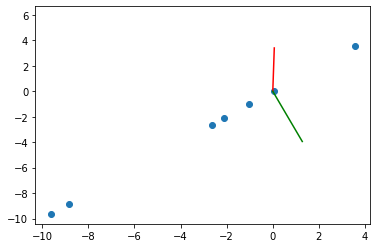

In [81]:
import numpy as np
import pandas as pd
import scipy.sparse as sp
from scipy.linalg import svd

from numpy import array
from sklearn.decomposition import TruncatedSVD
data = pd.read_csv("utility.csv")
print(data)
labeled = pd.read_csv("utility.csv").to_numpy()
df = pd.read_csv("utility.csv").to_numpy()
print(df)
df = df[:,1:]
print(df)
print(df[0,:])
A = df[0,:]
print("A" ,A)
B = df[2,:]
print("B" ,B)
C = df[2,:]
print("C" ,C)
D = df[4,:]
print("D" ,D)
BA = np.linalg.norm(B-A)
print(BA)
BD = np.linalg.norm(B-D)
print(BD)
""" 
#distances to A
for i in range(len(df[:,0])):
    AX = np.linalg.norm(A-df[i])
    print("A to " ,labeled[i,0])
    print(AX)
    
#distances to B
for i in range(len(df[:,0])):
    BX = np.linalg.norm(B-df[i])
    print("B to " ,labeled[i,0])
    print(BX)
#distances to C
for i in range(len(df[:,0])):
    CX = np.linalg.norm(C-df[i])
    print("C to " ,labeled[i,0])
    print(CX)
"""   
user = np.zeros_like(df[1,:],float)
user[0] = 9
print(user)
for i in range(len(df[:,0])):
    userX = np.linalg.norm(user-df[i])
    print("User to " ,labeled[i,0])
    print(userX)
    
# SVD
M = np.vstack([user,df.astype(float)])
print(M)
U, s, VT = svd(M.astype(float))
print("Utility Matrix")
print(U)
# create m x n Sigma matrix
Sigma = np.zeros((M.shape[0], M.shape[1]))
# populate Sigma with n x n diagonal matrix
Sigma[:M.shape[1], :M.shape[1]] = np.diag(s)
# reconstruct matrix
B = U.dot(Sigma.dot(VT))
print(B)

def compute_pcs(X,lam,P):
    # Covariance matrix
    Cov = 1/P*np.dot(X.T,X)+lam*np.eye(X.shape[1])
    # use nmupy to get eigenvalues and eigenvectors
    D,V = np.linalg.eigh(Cov)
    return D,V
D,V = compute_pcs(M,0.1,2)
print("D ", D)
print("V ", V)
plt.scatter(df[:,1],df[:,2])
plt.plot([0, V[0,0]],[0, V[1,0]],'g')
plt.plot([0, V[0,1]],[0, V[1,1]],'g')
plt.show()
maxD = np.max(D)
maxIndex = np.where(D==maxD)
Vmax = V[maxIndex]
Vmax.reshape(-1,1)
np.linalg.norm(Vmax)
print("maxD" ,maxD)
print("Vmax" ,Vmax)
dot = np.dot(np.asarray(df),np.asarray(Vmax).T)
print("dot" ,dot)
plt.scatter(dot,dot)

plt.plot([0, 10*V[0,0]],[0, 10*V[1,0]],'r')
plt.plot([0, 50*V[0,1]],[0, 50*V[1,1]],'g')

dot2 = np.dot(np.asarray(user),np.asarray(Vmax).T)
print(dot2)
plt.plot(dot2,'g')
plt.show()